In [1]:
source('helpers.R')

In [3]:
merged_CD8CARpos <- readRDS("../../../ProcessedData/seurat/csf_and_ip_cd8s.rds")

In [7]:
gene_list <- c("TNFRSF9", "IL2RA", "CD27", "NELL2","SELL","CCR7", "CD38", "ENTPD1", "PTPRC", "CD69", 
               "IL7R", "CD226", "CTLA4", "EOMES", "FOXP3", "HLADR", "MKI67", 
               "LAG3", "PDCD1", "TBX21", "TCF7", "TIGIT", "HAVCR2", "TOX2", "CAR")

In [8]:
pdf(file.path(panel.path, paste0("2E_cd8_key_genes.pdf")), width=7, height=1.75)
P <- Clustered_DotPlot(merged_CD8CARpos,  features = gene_list, k = 1, x_lab_rotate=90,
        cluster_feature = F, cluster_ident = T, flip=T, exp_color_max=1, exp_color_min=-2,  
        show_ident_colors=F,  colors_use_exp = colorRampPalette(c("darkgreen","white","darkorchid4"))(100)) 
dev.off()

Warning message:
"The following features were omitted as they were not found:
ℹ HLADR"
Warning message:
"Scaling data with a low number of groups may produce misleading results"


pdf 
  2

[[1]]

[[2]]



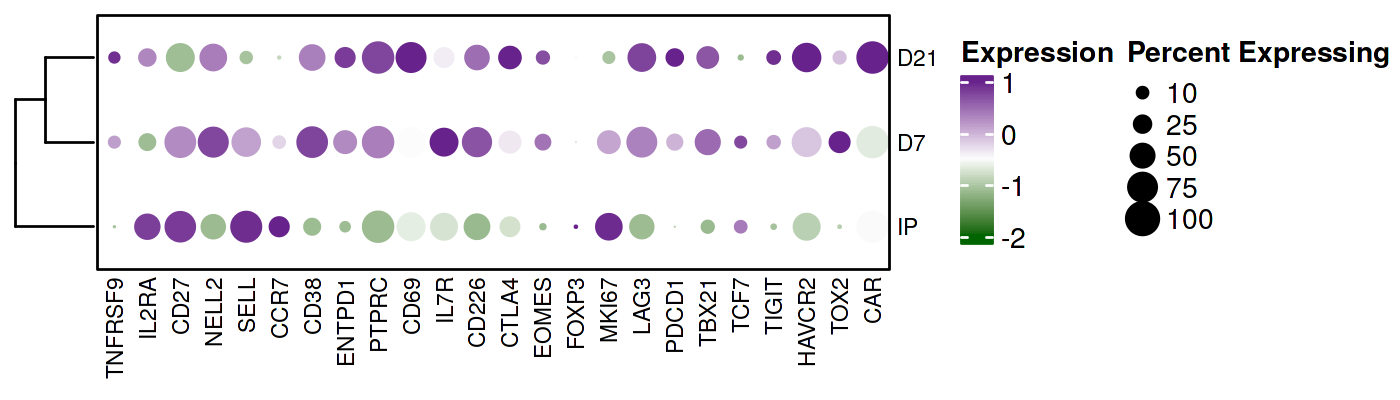

In [9]:
options(repr.plot.width=7, repr.plot.height=2, repr.plot.res=200)
print(P)

In [10]:
cytokine_list <- c(
  # Interleukin family
  "IL1A", "IL1B", "IL1RN", "IL18", "IL33", "IL36A", "IL36RN", "IL2", "IL4", "IL13",
  "IL7", "TSLP", "IL9", "IL15", "IL21", "IL3", "IL5", "CSF2", "IL6", "IL11",
  "IL27", "EBI3", "IL31", "LIF", "OSM", "CTF1",  "IL12A", "IL12B", "IL23A", 
  "IL10", "IL19", "IL20", "IL22", "IL24", "IL17A", "IL17B", "IL17C", "IL17D", "IL25", "IL17F",
  
  # Interferons
  "IFNA1", "IFNB1", "IFNE", "IFNK", "IFNG", "IFNL2",
  
  # TNF superfamily ligands
  "LTA", "LTB", "TNF", "TNFSF4", "CD40LG", "FASLG", "CD70", "TNFSF8", "TNFSF9", 
  "TNFSF10", "TNFSF11", "TNFSF12", "TNFSF13", "TNFSF13B", "TNFSF14", "TNFSF15", "TNFSF18",
  
  # Complement factors
  "C3", "C5",
  
  # Growth factors
  "FLT3LG", "IL34", "CSF1", "CSF3", "KITLG", "EGF", "VEGFA", "FGF2", "HGF", "IGF1", 
  "TGFB1", "GDNF", "PSPN", 
  
  # Hormones and related factors
  "PRL", "LEP", "ADIPOQ", "RETN", 
  
  # Other factors
  "NOG", "DCN", "THPO"
)

In [12]:
feature_stats <- data.frame(
  mean = rowMeans(merged_CD8CARpos@assays$RNA@data[cytokine_list,]),
  var = apply(merged_CD8CARpos@assays$RNA@data[cytokine_list,], 1, var)
)
good_features <- rownames(feature_stats)[feature_stats$var > 0 & !is.na(feature_stats$var)]

In [13]:
pdf(file.path(panel.path, paste0("2F_cd8_cytokine.pdf")), width=10, height=2.2)
P <- Clustered_DotPlot(merged_CD8CARpos,  features = good_features,  x_lab_rotate=90, 
        cluster_feature = T, cluster_ident = F, flip=T, exp_color_max=1, exp_color_min=-1,  
        show_ident_colors=F,  colors_use_exp = colorRampPalette(c("darkgreen","white","darkorchid4"))(100)) 
dev.off()

Warning message:
"Scaling data with a low number of groups may produce misleading results"


pdf 
  2

[[1]]

[[2]]



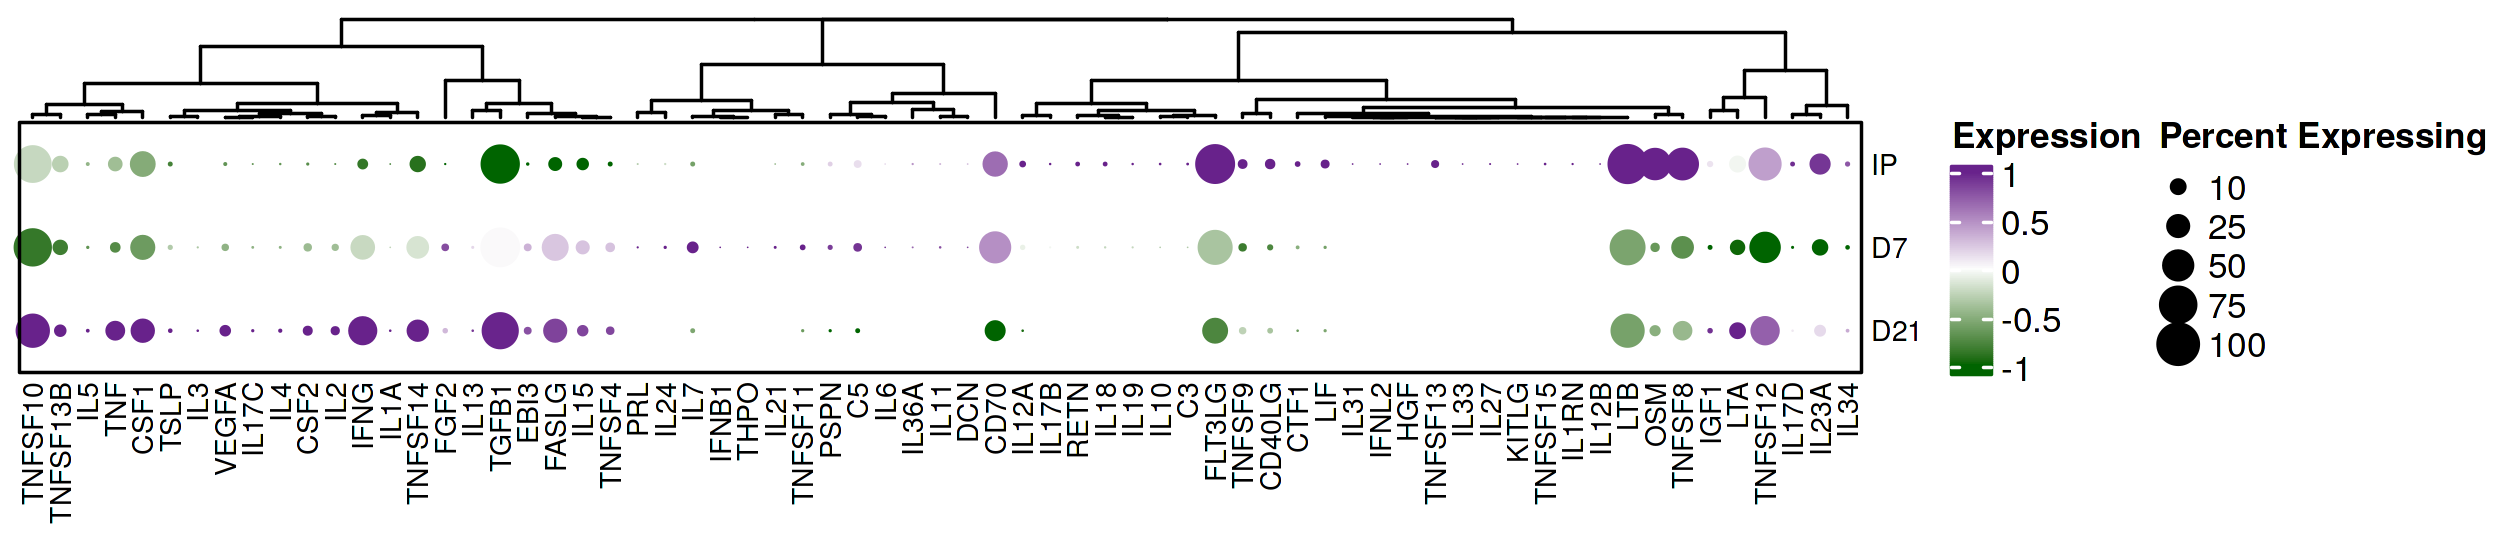

In [14]:
options(repr.plot.width=10, repr.plot.height=2.2, repr.plot.res=250)
print(P)

In [15]:
receptor_list <- c( 
  "IL1R1", "IL1RAP", "IL18R1", "IL18RAP", "IL1RL1", "IL1RL2", "IL2RA", "IL2RB", "IL2RG",
  "IL4R", "IL13RA1", "IL7R", "CRLF2", "IL9R", "IL15RA", "IL21R", "IL3RA", "CSF2RB",
  "IL5RA", "CSF2RA", "IL6R", "IL6ST", "IL11RA", "IL27RA", "IL31RA", "OSMR", "LIFR",
  "CNTFR", "IL12RB2", "IL12RB1", "IL23R", "IL10RA", "IL10RB", "IL20RRA", "IL20RB",
  "IL22RA1", "IL17RA", "IL17RC", "IL17RB", "IL17RE"
)

In [16]:
pdf(file.path(panel.path, paste0("cd8_chemokine_receptor.pdf")), width=7.5, height=2)
P <- Clustered_DotPlot(merged_CD8CARpos,  features = receptor_list,  x_lab_rotate=90, 
        cluster_feature = T, cluster_ident = F, flip=T, exp_color_max=1, exp_color_min=-1,  
        show_ident_colors=F,  colors_use_exp = colorRampPalette(c("darkgreen","white","darkorchid4"))(100)) 
dev.off()

Warning message:
"The following features were omitted as they were not found:
ℹ IL20RRA"
Warning message:
"Scaling data with a low number of groups may produce misleading results"


pdf 
  2

[[1]]

[[2]]



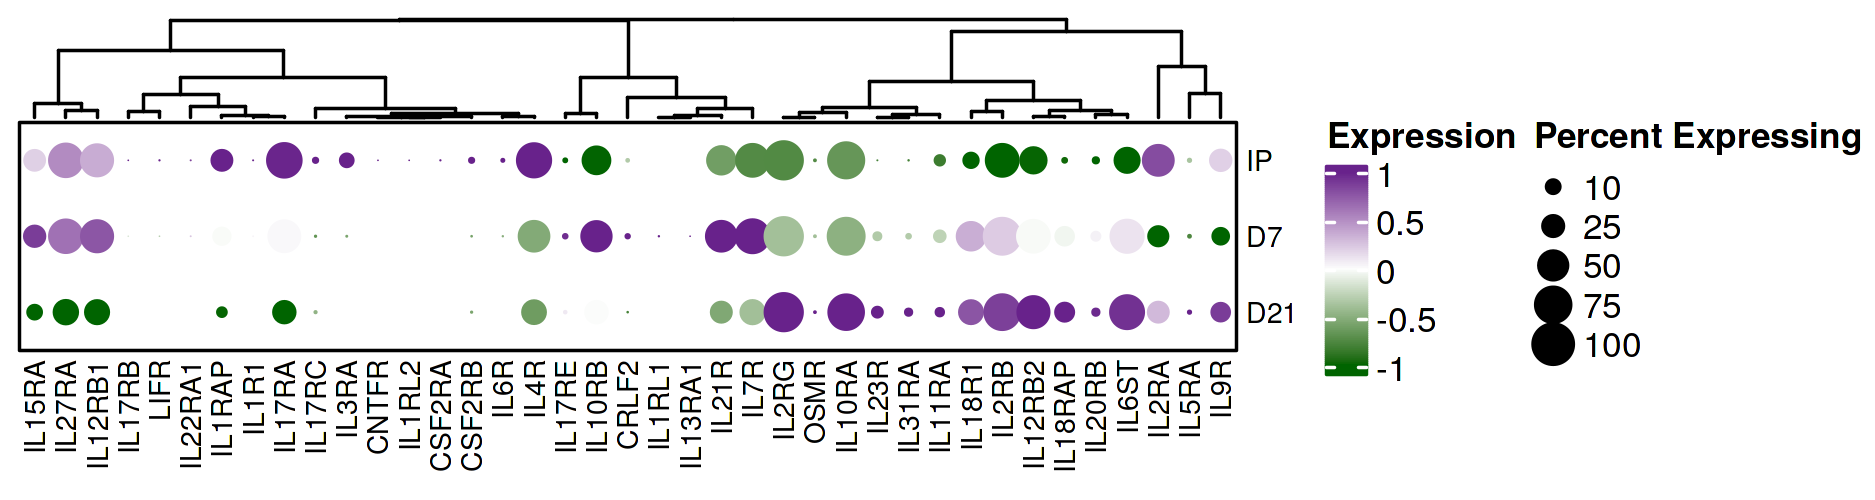

In [17]:
options(repr.plot.width=7.5, repr.plot.height=2, repr.plot.res=250)
print(P)